# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [90]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\akhil\Desktop\DSAI\Codes\EDA Taxi assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [92]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [94]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [31]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import time

# Select the folder having data files
os.chdir(r'C:\Users\akhil\Desktop\DSAI\Codes\EDA Taxi assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
final_df = pd.DataFrame()

file_count = 0
# iterate through the list of files and sample one by one:
for file_name in file_list:
    start_time = time.time()
    file_count += 1
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)
        df['Date'] = df['tpep_pickup_datetime'].dt.date
        df['Time'] = df['tpep_pickup_datetime'].dt.hour
        #df.drop('tpep_pickup_datetime',axis=1, inplace = True)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for dates in df.Date.unique():
            date_data = df[df['Date'] == dates]
            
            # Iterate through each hour of the selected date
            for hours in df.Time.unique():
                hour_data = date_data[date_data['Time'] == hours]
                
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=1)
                
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data,sample])
                
        # Concatenate the sampled data of all the dates to a single dataframe
        final_df = pd.concat([final_df, sampled_data]) # we initialised this empty DF earlier
        end_time = time.time()
        print(f"{file_name} processed in {end_time - start_time}, {len(file_list) - file_count} remaining")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
final_df.to_parquet('sampled_data.parquet')

In [ ]:
final_df.shape

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [5]:
# Load the new data file
import os
os.chdir(r'C:\Users\akhil\Desktop\DSAI\Codes\EDA Taxi assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')
df = pd.read_parquet('sampled_data.parquet')

In [7]:
df.shape

(1896400, 22)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 876 to 2698779
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

In [15]:
# Fix the index and drop any columns that are not needed

# Reset index and drop the old index
df.reset_index(drop = True,inplace = True) 

# drop unncessary columns
df.drop(['store_and_fwd_flag','mta_tax','improvement_surcharge'], axis = 1, inplace = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [18]:
# Combine the two airport fee columns
df.Airport_fee = df.Airport_fee.fillna(df.airport_fee)

# Drop the redundant 'airport_fee' column
df.drop('airport_fee',axis = 1, inplace = True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative
df[df.fare_amount < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, total_amount, congestion_surcharge, Date, Time, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [24]:
# Analyse RatecodeID for the negative fare amounts
df.loc[df.fare_amount < 0,'RatecodeID']

Series([], Name: RatecodeID, dtype: float64)

In [26]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'Date', 'Time',
       'Airport_fee'],
      dtype='object')

In [28]:
# Find which columns have negative values
df[['fare_amount', 'extra', 'tip_amount','tolls_amount', 'total_amount', 'congestion_surcharge','Airport_fee']].lt(0).any()

fare_amount             False
extra                    True
tip_amount              False
tolls_amount            False
total_amount             True
congestion_surcharge     True
Airport_fee              True
dtype: bool

In [30]:
# fix these negative values
print((df.extra < 0).sum())
print((df.total_amount < 0).sum())
print((df.congestion_surcharge < 0).sum())
print((df.Airport_fee < 0).sum())

3
92
56
24


In [32]:
df = df[~(df[['extra','total_amount','congestion_surcharge','Airport_fee']] < 0).any(axis = 1)]

In [33]:
print((df.extra < 0).sum())
print((df.total_amount < 0).sum())
print((df.congestion_surcharge < 0).sum())
print((df.Airport_fee < 0).sum())

0
0
0
0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [38]:
# Find the proportion of missing values in each column
df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.032469
trip_distance            0.000000
RatecodeID               0.032469
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
congestion_surcharge     0.032469
Date                     0.000000
Time                     0.000000
Airport_fee              0.032469
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [40]:
# Display the rows with null values
df[df.passenger_count.isnull()]

# Impute NaN values in 'passenger_count' to median
df.loc[df.passenger_count.isnull(),'passenger_count'] = df.passenger_count.median()

Did you find zeroes in passenger_count? Handle these.

In [43]:
# Replace zero values in passenger count with the median
df.loc[df.passenger_count == 0,'passenger_count'] = df.passenger_count.median()

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [47]:
# Fix missing values in 'RatecodeID'
df.loc[df.RatecodeID.isnull(),'RatecodeID'] = df.RatecodeID.median()

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [50]:
# handle null values in congestion_surcharge
df.congestion_surcharge.median()
df.congestion_surcharge.mode()
df.congestion_surcharge.isnull().sum()

# Fill missing values in congestion_surcharge using the median
df.loc[df.congestion_surcharge.isnull(),'congestion_surcharge'] = df.congestion_surcharge.median()


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [53]:
# Handle any remaining missing values

# Fill any remaining missing values in Airport_fee using the median
df.Airport_fee.median()
df.loc[df.Airport_fee.isnull(),'Airport_fee'] = df.Airport_fee.median()

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

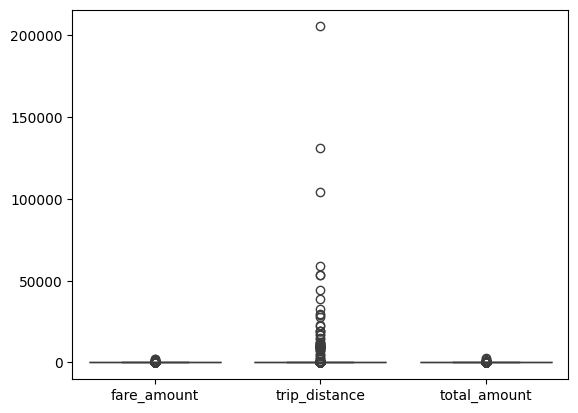

In [57]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns
sns.boxplot(data=df[['fare_amount', 'trip_distance', 'total_amount']])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [61]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [62]:
# Continue with outlier handling

#Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df.loc[~((df.trip_distance < 1) & (df.fare_amount > 300))]

#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df = df.loc[~((df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))]

#Entries where trip_distance is more than 250 miles.
df = df.loc[~(df.trip_distance >= 250)]

#Entries where payment_type is 0
df.loc[df.payment_type == 0, 'payment_type'] = df.payment_type.median()


In [63]:
# fare_amount entry greater than 1000
df = df.loc[~(df.fare_amount >= 1000)]

# remove RatecodeID entries greater than 6 since it makes up to .5% of the total data 
df = df.loc[~(df.RatecodeID > 6)]

# entries with trip distance equal to 0 but tip more than 0 is suspicious 
df = df.loc[~((df.tip_amount > 0) & (df.trip_distance == 0))]

# entries with trip distance equal to 0 but toll more than 0 is suspicious
df = df.loc[~((df.tolls_amount > 0) & (df.trip_distance == 0))]

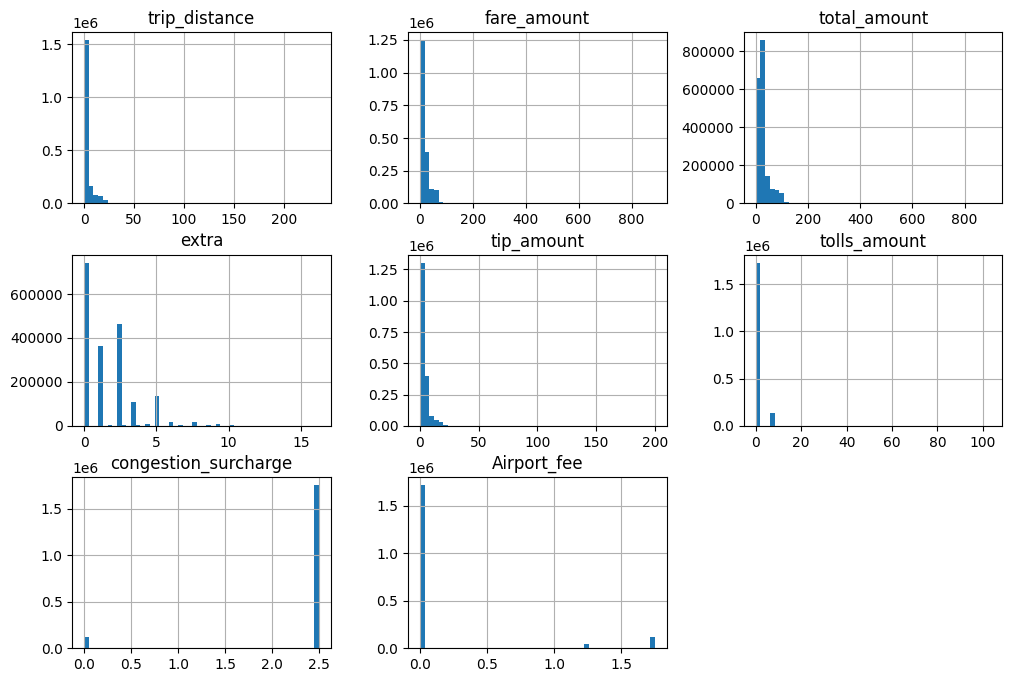

In [64]:
# Do any columns need standardising?
df[['trip_distance', 'fare_amount', 'total_amount', 'extra', 'tip_amount', 'tolls_amount', 'congestion_surcharge', 'Airport_fee']].hist(bins=50, figsize=(12, 8))
plt.show()


In [65]:
# Check summary statistics to decide if standardization is needed

#set output display to flot format 0.00 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#describe to check for standardization potential
df[['trip_distance', 'fare_amount', 'total_amount', 'extra', 'tip_amount',
    'tolls_amount', 'congestion_surcharge', 'Airport_fee']].describe()

#trip_distance, fare_amount, total_amount, extra, tip_amount, tolls_amount can be standarized

trip_distance  fare_amount  total_amount      extra  tip_amount  \
count     1875575.00   1875575.00    1875575.00 1875575.00  1875575.00   
mean            3.46        19.73         28.83       1.60        3.56   
std             4.55        18.07         22.70       1.83        3.99   
min             0.00         0.00          0.00       0.00        0.00   
25%             1.06         9.30         15.96       0.00        1.00   
50%             1.80        13.50         21.00       1.00        2.86   
75%             3.40        21.90         30.72       2.50        4.45   
max           235.36       887.80        899.60      16.25      200.00   

       tolls_amount  congestion_surcharge  Airport_fee  
count    1875575.00            1875575.00   1875575.00  
mean           0.59                  2.33         0.14  
std            2.17                  0.62         0.46  
min            0.00                  0.00         0.00  
25%            0.00                  2.50         0.00  
50%            0.00                  2.50         0.00  
75%            0.00                  2.50         0.00  
max          103.45                  2.50         1.75

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'Date',
 'Time',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical / Datetime
* `tpep_dropoff_datetime`: Categorical / Datetime
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?
**All are Numerical**

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [72]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour

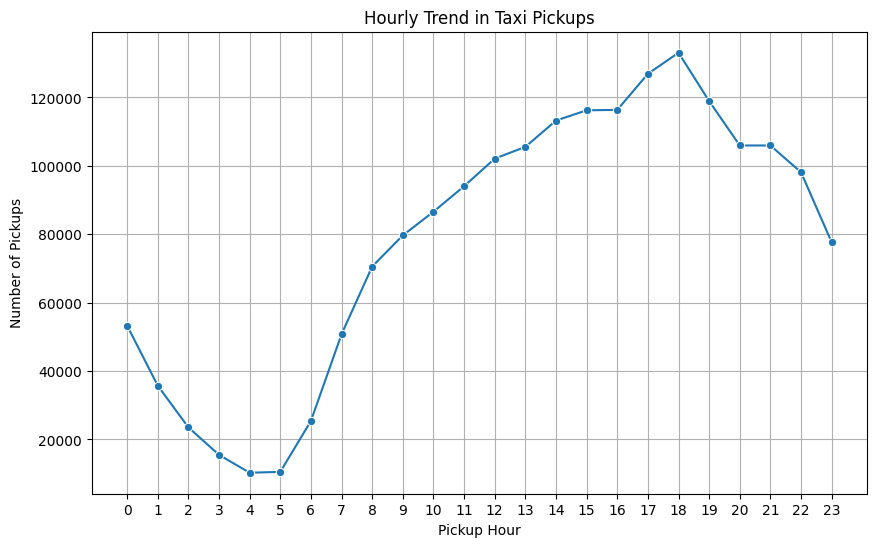

In [73]:
# Count number of pickups per hour and sort by hour
hourly_trend = df.pickup_hour.value_counts().reset_index(name = 'pickup_count').sort_values(by = 'pickup_hour')

# Plot hourly pickup trend
plt.figure(figsize = (10,6))
plt.title('Hourly Trend in Taxi Pickups')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
sns.lineplot(data = hourly_trend, x = 'pickup_hour', y = 'pickup_count', marker = 'o')
plt.show()

In [74]:
hourly_trend

pickup_hour  pickup_count
16            0         53249
18            1         35710
20            2         23519
21            3         15475
23            4         10260
22            5         10511
19            6         25410
17            7         50755
15            8         70552
13            9         79645
12           10         86571
11           11         94032
9            12        102094
8            13        105535
5            14        113219
4            15        116227
3            16        116352
1            17        126893
0            18        133061
2            19        118915
6            20        105939
7            21        105936
10           22         98099
14           23         77616

In [75]:
# Find and show the daily trends in taxi pickups (days of the week)
import calendar
df['day_of_week'] = df.tpep_pickup_datetime.dt.day_of_week.apply(lambda x: calendar.day_name[x])

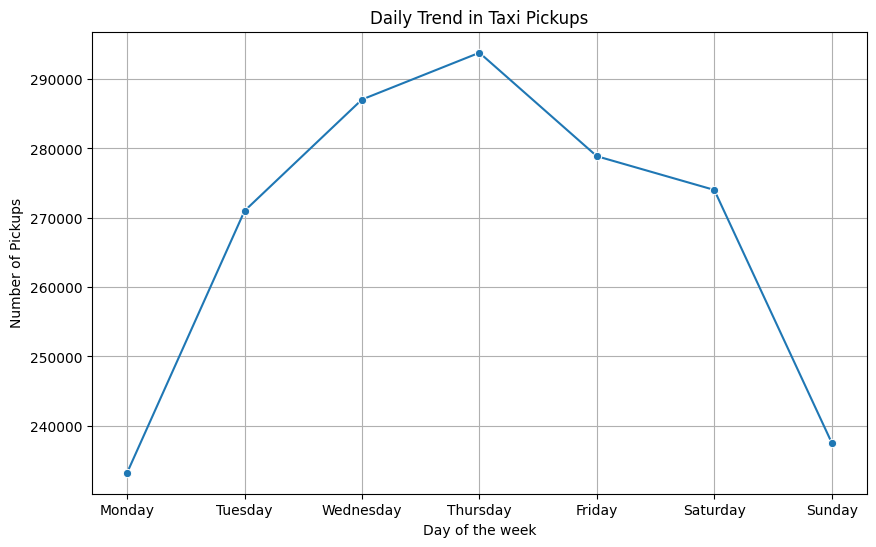

In [76]:
daily_trend = df.day_of_week.value_counts().reset_index(name = 'pickup_count')
daily_trend['day_of_week'] = pd.Categorical(daily_trend['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
daily_trend = daily_trend.sort_values(by='day_of_week')
plt.figure(figsize = (10,6))
plt.title('Daily Trend in Taxi Pickups')
plt.xlabel('Day of the week')
plt.ylabel('Number of Pickups')
plt.grid(True)
sns.lineplot(data = daily_trend, x = 'day_of_week', y = 'pickup_count', marker = 'o')
plt.show()


In [77]:
daily_trend

day_of_week  pickup_count
6      Monday        233221
4     Tuesday        270999
1   Wednesday        287066
0    Thursday        293817
2      Friday        278887
3    Saturday        274022
5      Sunday        237563

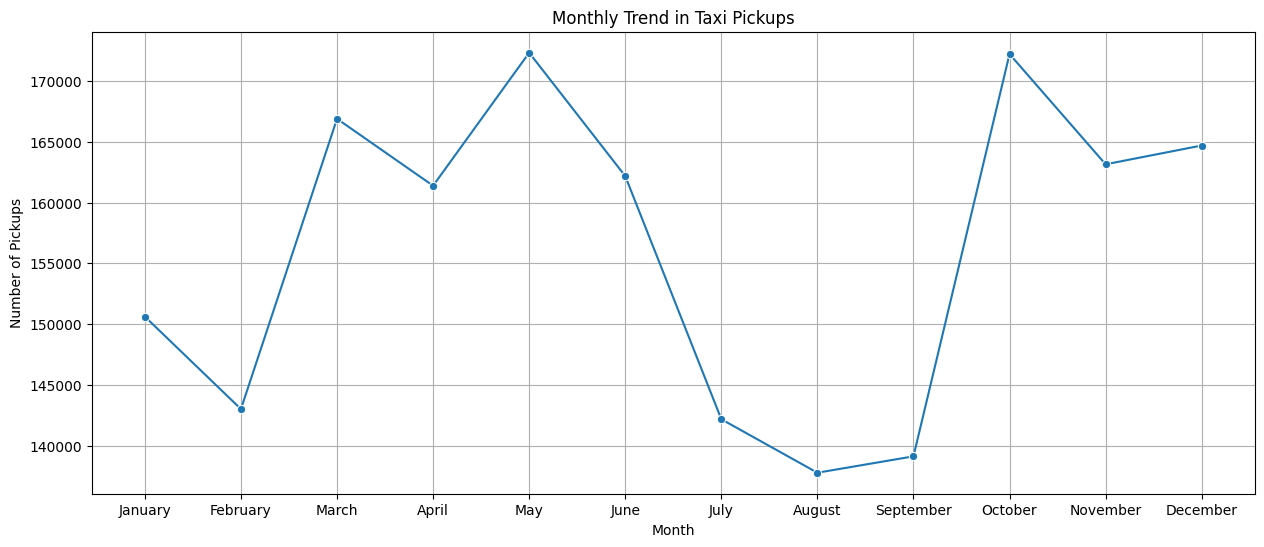

In [78]:
# Show the monthly trends in pickups
df['month'] = df.tpep_pickup_datetime.dt.month_name()
monthly_trend = df.month.value_counts().reset_index(name = 'pickup_count')
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
monthly_trend = monthly_trend.sort_values(by='month')
plt.figure(figsize = (15,6))
plt.title('Monthly Trend in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
sns.lineplot(data = monthly_trend, x = 'month', y = 'pickup_count', marker = 'o')
plt.show()

In [79]:
monthly_trend

month  pickup_count
7     January        150624
8    February        143021
2       March        166890
6       April        161385
0         May        172320
5        June        162179
9        July        142187
11     August        137788
10  September        139134
1     October        172210
4    November        163146
3    December        164691

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [82]:
# Analyse the above parameters
# removing entries with fare amount as zero or less and trip distance as zero or less 
# tip_amount can be zero that is not a flaw
df = df.loc[~((df.fare_amount <= 0))]
df = df.loc[~((df.total_amount <= 0))]
df.reset_index(drop = True,inplace = True)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
**Not necessary because the data that accounts to all the zeroes is fractional**

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [85]:
# Create a df with non zero entries for the selected parameters.
df1 = df.loc[((df.fare_amount > 0) & (df.total_amount > 0))]
df1 = df.loc[~((df.trip_distance == 0) & (df.PULocationID != df.DOLocationID))]
df1.reset_index(drop = True,inplace = True)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

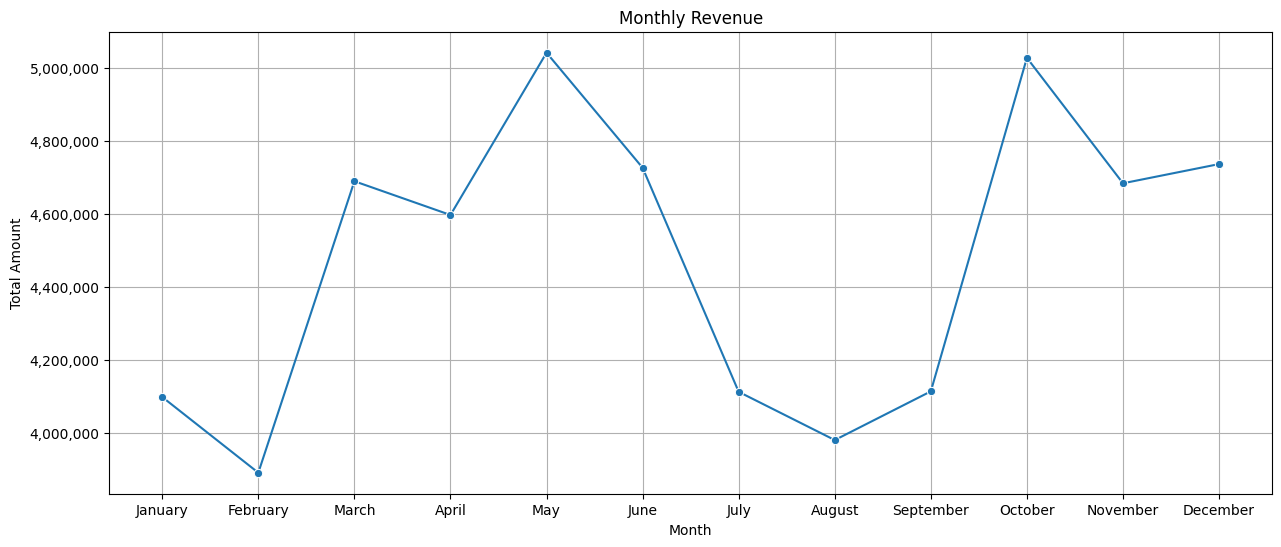

In [87]:
# Group data by month and analyse monthly revenue
import matplotlib.ticker as ticker
monthly_trend = df1.groupby('month')['total_amount'].sum().reset_index()
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
monthly_trend = monthly_trend.sort_values(by='month')

# Plot the revenue trend over months
plt.figure(figsize = (15,6))
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
sns.lineplot(data = monthly_trend, x = 'month', y = 'total_amount', marker = 'o')
plt.show()

In [88]:
monthly_revenue_table = df1.groupby('month')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending=False)
monthly_revenue_table

month  total_amount
8         May    5041538.03
10    October    5027495.01
2    December    4736444.94
6        June    4726279.57
7       March    4689441.75
9    November    4683798.24
0       April    4596963.87
11  September    4113735.50
5        July    4112409.03
4     January    4098148.24
1      August    3980249.31
3    February    3890773.64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [90]:
# Calculate proportion of each quarter
df1['quarter'] = df1.tpep_pickup_datetime.dt.quarter

# Group by quarter and sum total_amount to get revenue per quarter
quarter_revenue = df1.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion (%) each quarter contributes to the total yearly revenue
quarter_revenue['proportions'] = (quarter_revenue.total_amount/quarter_revenue.total_amount.sum())*100
quarter_revenue


quarter  total_amount  proportions
0        1   12678363.63        23.61
1        2   14364781.47        26.75
2        3   12206393.84        22.73
3        4   14447738.19        26.91

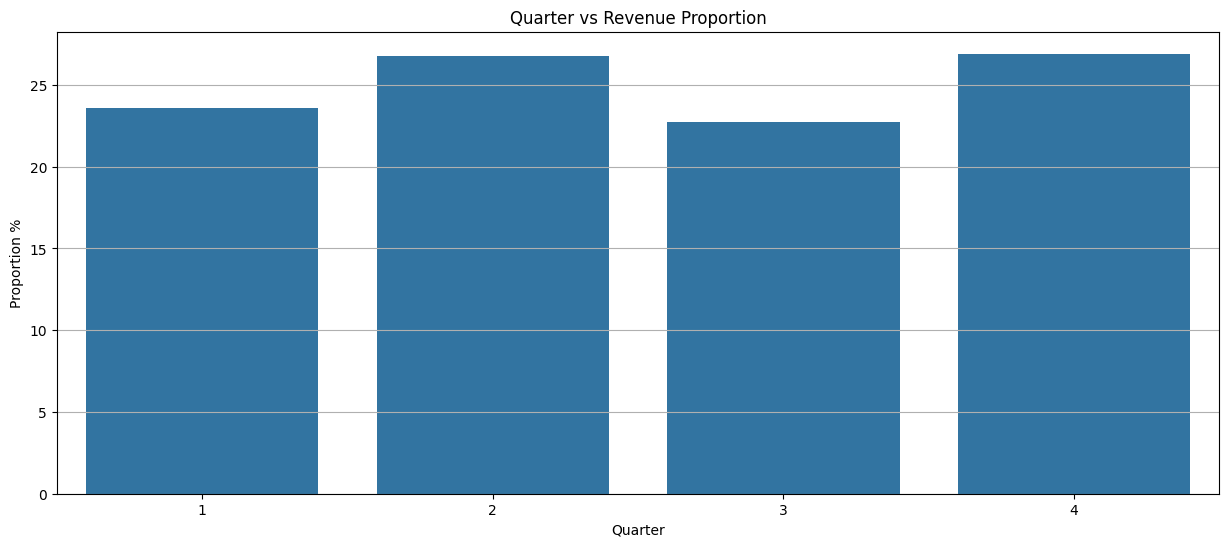

In [91]:
# Plot the revenue proportions using a bar chart
plt.figure(figsize = (15,6))
plt.title('Quarter vs Revenue Proportion')
plt.xlabel('Quarter')
plt.ylabel('Proportion %')
plt.grid(True)
sns.barplot(data = quarter_revenue, x = 'quarter', y = 'proportions')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

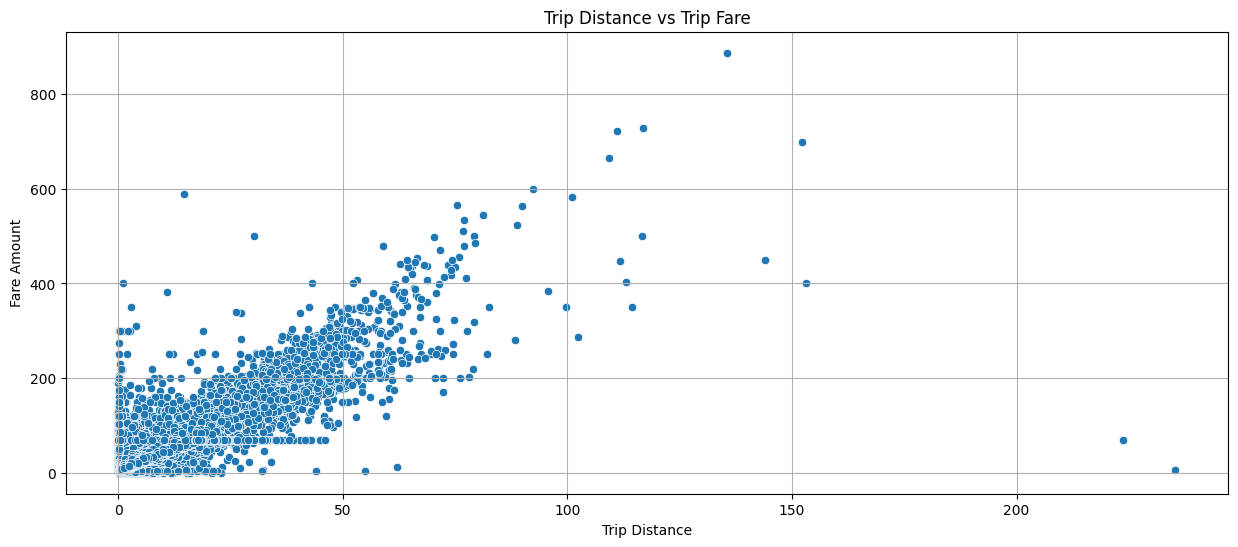

0.9437246683081757


trip_distance  fare_amount
count     1851105.00   1851105.00
mean            3.51        19.72
std             4.56        17.99
min             0.01         0.01
25%             1.09         9.30
50%             1.80        13.50
75%             3.44        21.90
max           235.36       887.80

In [93]:
# Show how trip fare is affected by distance
df1_nonzero = df1[df1.trip_distance>0]
plt.figure(figsize = (15,6))
plt.title('Trip Distance vs Trip Fare')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.grid(True)
sns.scatterplot(data = df1_nonzero, x = 'trip_distance', y = 'fare_amount')
plt.show()

print(df1_nonzero['trip_distance'].corr(df1_nonzero['fare_amount']))
df1_nonzero[['trip_distance', 'fare_amount']].describe()

# with a positive correlation we can say that the fare increases with the trip distance

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

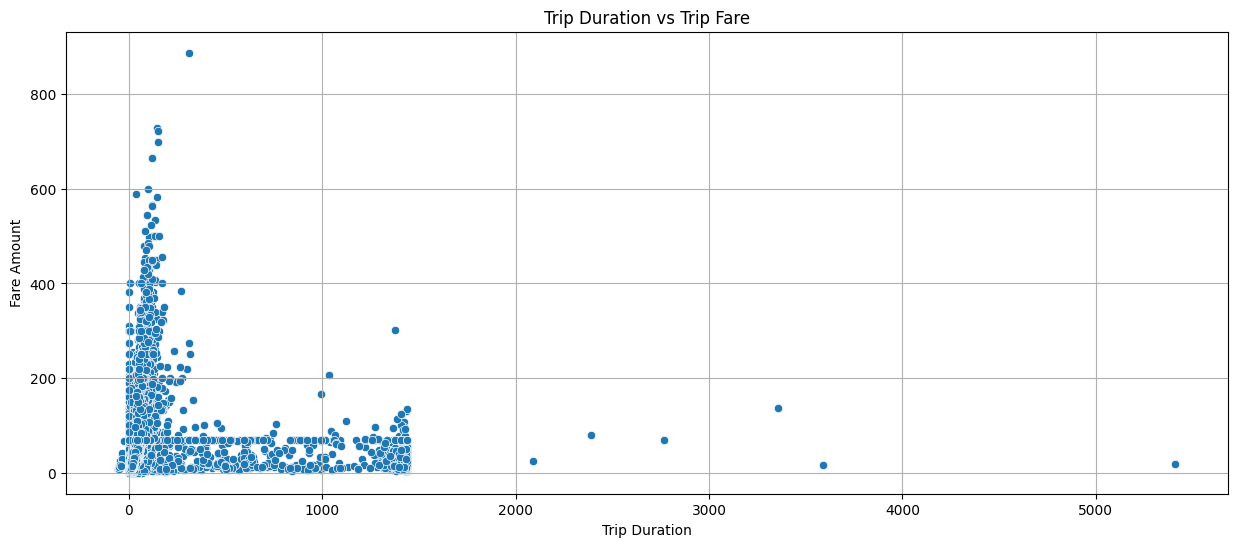

0.2777603266609372

In [95]:
# Show relationship between fare and trip duration
df1_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df1_nonzero.tpep_pickup_datetime)
df1_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df1_nonzero.tpep_dropoff_datetime)
df1_nonzero['trip_duration'] = (df1_nonzero.tpep_dropoff_datetime - df1_nonzero.tpep_pickup_datetime).dt.total_seconds()/60

plt.figure(figsize = (15,6))
plt.title('Trip Duration vs Trip Fare')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.grid(True)
sns.scatterplot(data = df1_nonzero, x = 'trip_duration', y = 'fare_amount')
plt.show()

df1_nonzero['trip_duration'].corr(df1_nonzero['fare_amount'])

#trip duration does somewhat affect fare but not strongly

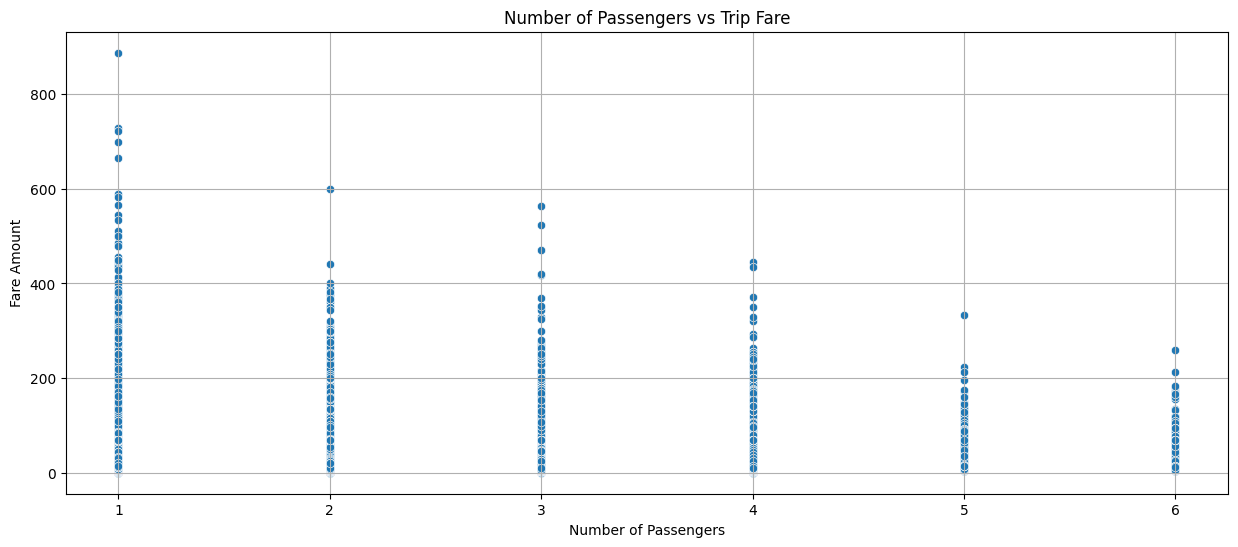

0.043143798895248

In [96]:
# Show relationship between fare and number of passengers

plt.figure(figsize = (15,6))
plt.title('Number of Passengers vs Trip Fare')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(True)
sns.scatterplot(data = df1_nonzero, x = 'passenger_count', y = 'fare_amount')
plt.show()

df1_nonzero['passenger_count'].corr(df1_nonzero['fare_amount'])

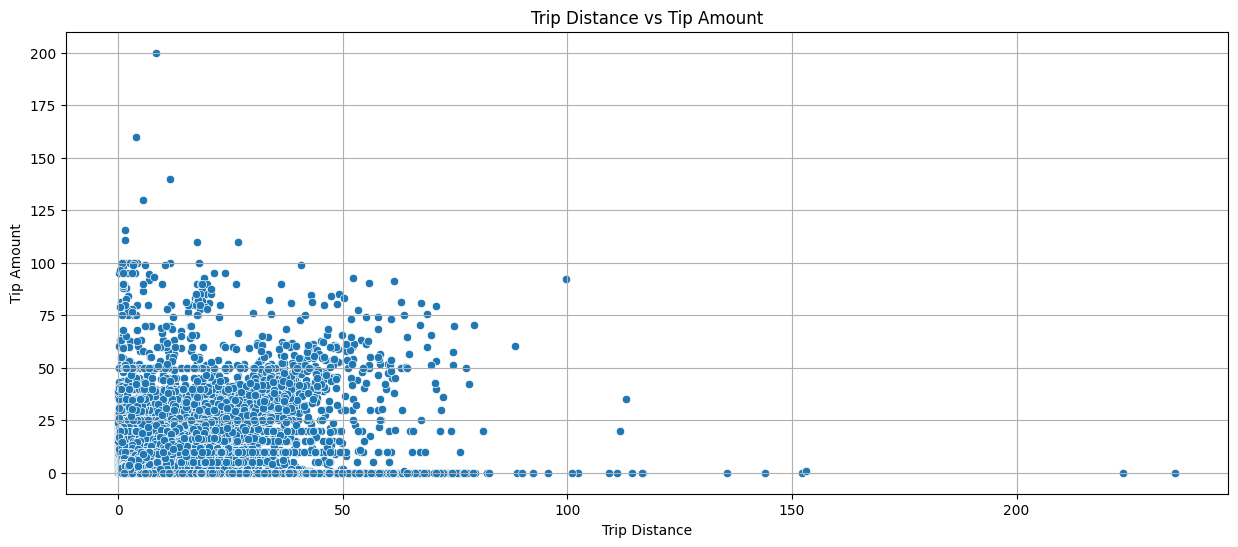

0.5991265150113962

In [97]:
# Show relationship between tip and trip distance
plt.figure(figsize = (15,6))
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.grid(True)
sns.scatterplot(data = df1_nonzero, x = 'trip_distance', y = 'tip_amount')
plt.show()

df1_nonzero['trip_distance'].corr(df1_nonzero['tip_amount'])
#tip is affected by the trip distance but not very much

In [98]:
df1_nonzero[['trip_duration', 'fare_amount', 'passenger_count', 'trip_distance', 'tip_amount']].describe()

trip_duration  fare_amount  passenger_count  trip_distance  tip_amount
count     1851105.00   1851105.00       1851105.00     1851105.00  1851105.00
mean           17.43        19.72             1.38           3.51        3.60
std            40.60        17.99             0.87           4.56        4.00
min           -54.12         0.01             1.00           0.01        0.00
25%             7.73         9.30             1.00           1.09        1.00
50%            12.70        13.50             1.00           1.80        2.88
75%            20.63        21.90             1.00           3.44        4.48
max          5411.00       887.80             6.00         235.36      200.00

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [100]:
df1_nonzero.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'Date', 'Time',
       'Airport_fee', 'pickup_hour', 'day_of_week', 'month', 'quarter',
       'trip_duration'],
      dtype='object')

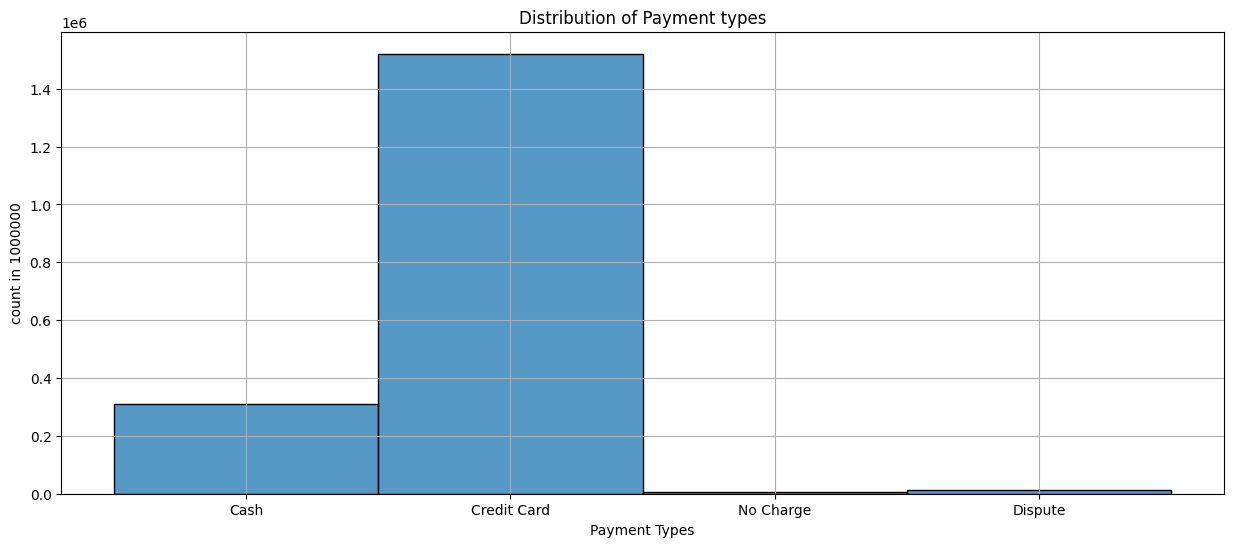

In [101]:
# Analyse the distribution of different payment types (payment_type).

# Mapping numeric payment_type codes to human-readable labels
payment_mapping = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided Trip'}
df1_nonzero['payment_type_label'] = df1_nonzero.payment_type.map(payment_mapping)

# Plotting the distribution of payment types
plt.figure(figsize = (15,6))
plt.title('Distribution of Payment types')
plt.xlabel('Payment Types')
plt.ylabel('count in 1000000')
plt.grid(True)
sns.histplot(data = df1_nonzero, x = 'payment_type_label')
plt.show()



In [102]:
# Extract count of each payment type for inference
payment_counts = df1_nonzero['payment_type_label'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']
payment_counts

payment_type    count
0  Credit Card  1520932
1         Cash   311099
2      Dispute    12318
3    No Charge     6756

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [107]:
# pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [109]:
import geopandas as gpd
os.chdir(r'C:\Users\akhil\Desktop\DSAI\Codes\EDA Taxi assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones')

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1        0.12        0.00           Newark Airport           1   
1         2        0.43        0.00              Jamaica Bay           2   
2         3        0.08        0.00  Allerton/Pelham Gardens           3   
3         4        0.04        0.00            Alphabet City           4   
4         5        0.09        0.00            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


['OBJECTID',
 'Shape_Leng',
 'Shape_Area',
 'zone',
 'LocationID',
 'borough',
 'geometry']

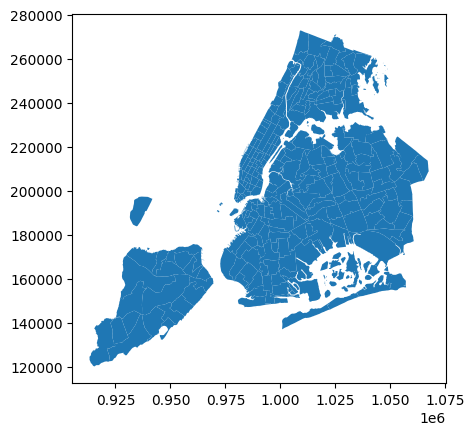

In [111]:
print(zones.info())
zones.plot()
zones.columns.tolist()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [114]:
# Merge zones and trip records using locationID and PULocationID
df1_nonzero = df1_nonzero.merge(zones[['OBJECTID','Shape_Leng','Shape_Area','zone','LocationID','borough', 'geometry']],left_on='PULocationID', right_on='LocationID', how='left')

# Drop the redundant LocationID column from merged data
df1_nonzero.drop('LocationID', axis=1, inplace = True)


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [116]:
# Group data by location and calculate the number of trips

# Count the number of trips per pickup location ID
trip_counts = df1_nonzero.groupby('PULocationID').size().reset_index(name = 'trip_count')

# Sort locations by highest number of trips
trip_counts = trip_counts.sort_values(by='trip_count', ascending=False)
trip_counts

PULocationID  trip_count
121           132       95818
223           237       88268
150           161       86265
222           236       78558
151           162       66443
..            ...         ...
79             84           1
40             44           1
101           111           1
97            105           1
42             46           1

[252 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [118]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [119]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones.loc[zones.trip_count.isnull(),'trip_count'] = 0

In [120]:
zones.sort_values(by = 'trip_count' , ascending = False)

OBJECTID  Shape_Leng  Shape_Area  \
131       132        0.25        0.00   
236       237        0.04        0.00   
160       161        0.04        0.00   
235       236        0.04        0.00   
161       162        0.04        0.00   
..        ...         ...         ...   
203       204        0.10        0.00   
104       105        0.08        0.00   
29         30        0.09        0.00   
171       172        0.12        0.00   
108       109        0.18        0.00   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
203                              Rossville/Woodrow         204  Staten Island   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
29                                   Broad Channel          30         Queens   
171                         New Dorp/Midland Beach         172  Staten Island   
108                                    Great Kills         109  Staten Island   

                                              geometry  PULocationID  \
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...        132.00   
236  POLYGON ((993633.442 216961.016, 993507.232 21...        237.00   
160  POLYGON ((991081.026 214453.698, 990952.644 21...        161.00   
235  POLYGON ((995940.048 221122.92, 995812.322 220...        236.00   
161  POLYGON ((992224.354 214415.293, 992096.999 21...        162.00   
..                                                 ...           ...   
203  POLYGON ((927766.539 141772.465, 927864.475 14...           NaN   
104  POLYGON ((979605.759 191880.575, 979978.435 19...           NaN   
29   POLYGON ((1034013.272 163473.152, 1034866.459 ...           NaN   
171  POLYGON ((960204.812 146820.751, 960103.437 14...           NaN   
108  POLYGON ((943392.585 147162.426, 943412.636 14...           NaN   

     trip_count  
131    95818.00  
236    88268.00  
160    86265.00  
235    78558.00  
161    66443.00  
..          ...  
203        0.00  
104        0.00  
29         0.00  
171        0.00  
108        0.00  

[263 rows x 9 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

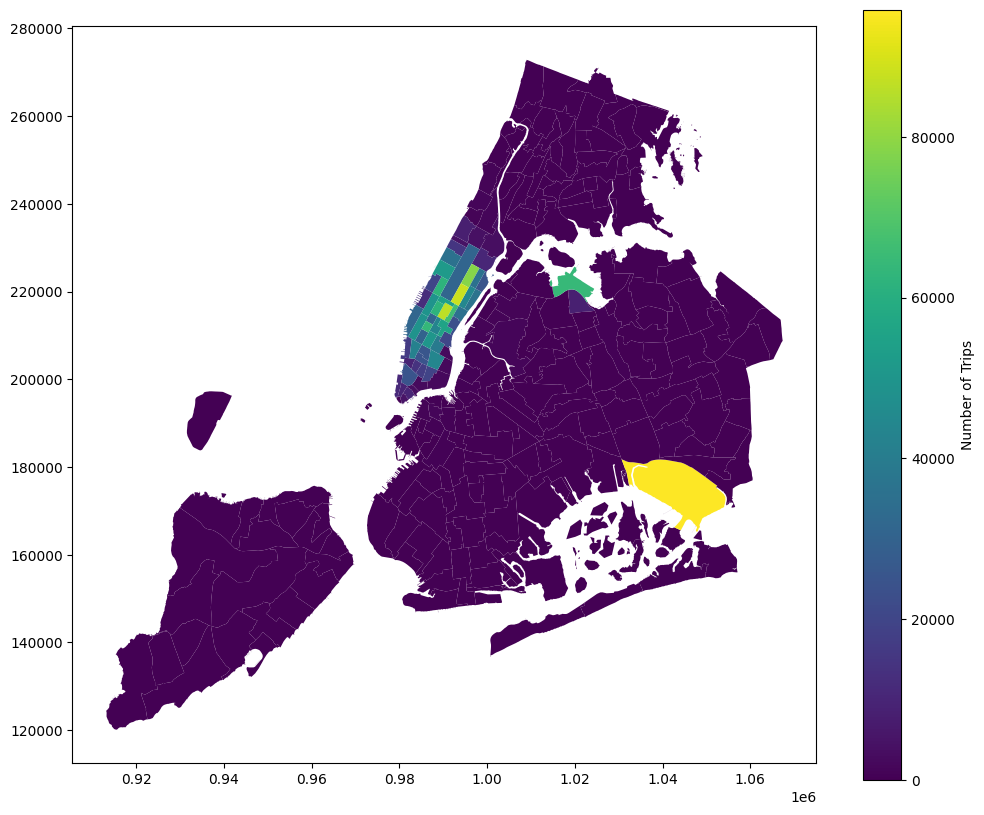

In [124]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'trip_count',ax = ax,legend = True,legend_kwds = {'label': 'Number of Trips', 'orientation': "vertical"})
plt.show()

In [125]:
# can you try displaying the zones DF sorted by the number of trips?
zones = zones.sort_values(by='trip_count', ascending=False)

zones.reset_index().drop('index', axis = 1)


OBJECTID  Shape_Leng  Shape_Area  \
0         132        0.25        0.00   
1         237        0.04        0.00   
2         161        0.04        0.00   
3         236        0.04        0.00   
4         162        0.04        0.00   
..        ...         ...         ...   
258       204        0.10        0.00   
259       105        0.08        0.00   
260        30        0.09        0.00   
261       172        0.12        0.00   
262       109        0.18        0.00   

                                              zone  LocationID        borough  \
0                                      JFK Airport         132         Queens   
1                            Upper East Side South         237      Manhattan   
2                                   Midtown Center         161      Manhattan   
3                            Upper East Side North         236      Manhattan   
4                                     Midtown East         162      Manhattan   
..                                             ...         ...            ...   
258                              Rossville/Woodrow         204  Staten Island   
259  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
260                                  Broad Channel          30         Queens   
261                         New Dorp/Midland Beach         172  Staten Island   
262                                    Great Kills         109  Staten Island   

                                              geometry  PULocationID  \
0    MULTIPOLYGON (((1032791.001 181085.006, 103283...        132.00   
1    POLYGON ((993633.442 216961.016, 993507.232 21...        237.00   
2    POLYGON ((991081.026 214453.698, 990952.644 21...        161.00   
3    POLYGON ((995940.048 221122.92, 995812.322 220...        236.00   
4    POLYGON ((992224.354 214415.293, 992096.999 21...        162.00   
..                                                 ...           ...   
258  POLYGON ((927766.539 141772.465, 927864.475 14...           NaN   
259  POLYGON ((979605.759 191880.575, 979978.435 19...           NaN   
260  POLYGON ((1034013.272 163473.152, 1034866.459 ...           NaN   
261  POLYGON ((960204.812 146820.751, 960103.437 14...           NaN   
262  POLYGON ((943392.585 147162.426, 943412.636 14...           NaN   

     trip_count  
0      95818.00  
1      88268.00  
2      86265.00  
3      78558.00  
4      66443.00  
..          ...  
258        0.00  
259        0.00  
260        0.00  
261        0.00  
262        0.00  

[263 rows x 9 columns]

In [126]:
top_5_trip_zones = zones[['zone', 'borough', 'trip_count']].sort_values(by='trip_count', ascending=False).head(5)
top_5_trip_zones

zone    borough  trip_count
131            JFK Airport     Queens    95818.00
236  Upper East Side South  Manhattan    88268.00
160         Midtown Center  Manhattan    86265.00
235  Upper East Side North  Manhattan    78558.00
161           Midtown East  Manhattan    66443.00

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [135]:
# Find routes which have the slowest speeds at different times of the day

# Calculate trip duration in hours
df1_nonzero['trip_duration_hours'] = df1_nonzero.trip_duration / 60

# Compute speed in miles per hour
df1_nonzero['speed_mph'] = df1_nonzero.trip_distance / df1_nonzero['trip_duration_hours']

# Filter out invalid entries (zero or negative durations or speeds)
df4speed = df1_nonzero[(df1_nonzero.trip_duration_hours > 0) & (df1_nonzero.speed_mph > 0)]

# Group by hour and route to find mean speed
route_speed = df4speed.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])['speed_mph'].mean().reset_index()

# Find the slowest route per hour
route_speed.loc[route_speed.groupby('pickup_hour')['speed_mph'].idxmin()]

pickup_hour  PULocationID  DOLocationID  speed_mph
3232              0           157           265       0.01
6009              1            25           256       0.15
11330             2            65           264       0.07
15155             3            42           238       0.15
19010             4            75            41       0.05
23790             5           230           264       0.04
24818             6            68            28       0.51
27837             7            13           209       0.04
32872             8            70            70       0.90
37431             9            48           146       0.19
47052            10           260            25       0.32
52045            11           237            69       0.11
56889            12           223           234       0.08
64072            13           264           152       1.14
68942            14           234           202       0.24
74191            15           215           148       0.11
76090            16            28            28       0.20
85431            17           162           106       0.26
91319            18           151           193       0.28
99578            19           237           193       0.02
100611           20            24           107       0.02
106799           21             9            73       0.10
114517           22            82            37       0.28
120950           23            75           211       0.33

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

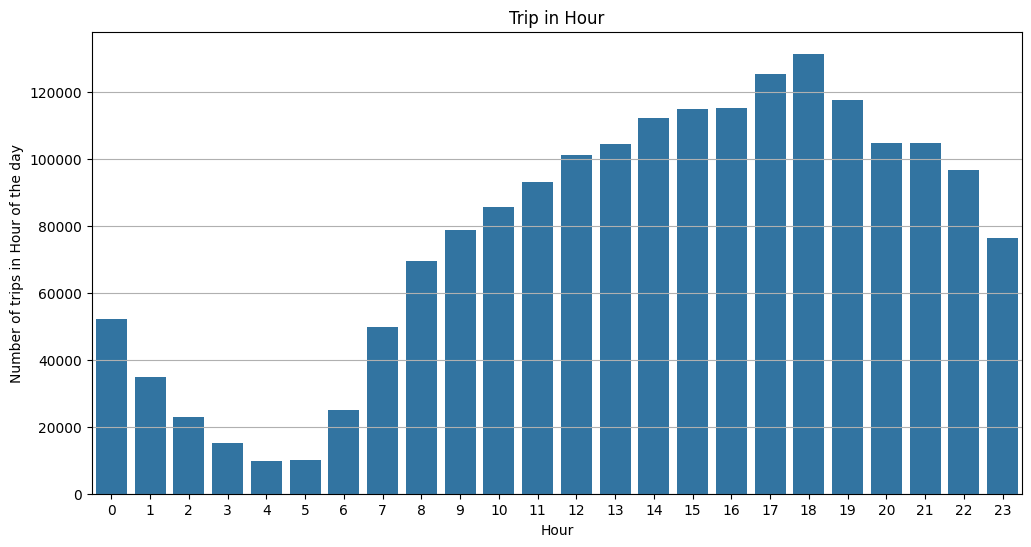

In [138]:
# Visualise the number of trips per hour and find the busiest hour

# Count trips per pickup hour and reset index for plotting
trip_in_hour = df1_nonzero.pickup_hour.value_counts().reset_index(name = 'count_of_trips').sort_index()

# Plotting number of trips by hour
plt.figure(figsize = (12,6))
plt.title('Trip in Hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips in Hour of the day')
plt.grid(True)
sns.barplot(data = trip_in_hour,x = 'pickup_hour', y = 'count_of_trips')
plt.show()

In [139]:
# Find the busiest hour
busiest_hour = trip_in_hour.loc[trip_in_hour['count_of_trips'].idxmax()]
print(f"Busiest Hour: {busiest_hour['pickup_hour']} with {busiest_hour['count_of_trips']} trips.")


Busiest Hour: 18 with 131406 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [142]:
# Sort to get the top 5 busiest hours
top_5_hours = trip_in_hour.sort_values(by='count_of_trips', ascending=False).head(5)

# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
top_5_hours['scaled_count_of_trip'] = top_5_hours['count_of_trips'] / sample_fraction
top_5_hours


pickup_hour  count_of_trips  scaled_count_of_trip
0           18          131406            2628120.00
1           17          125306            2506120.00
2           19          117504            2350080.00
3           16          115100            2302000.00
4           15          115005            2300100.00

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

day_type
Weekday   72.79
Weekend   27.21
Name: count_of_trips, dtype: float64


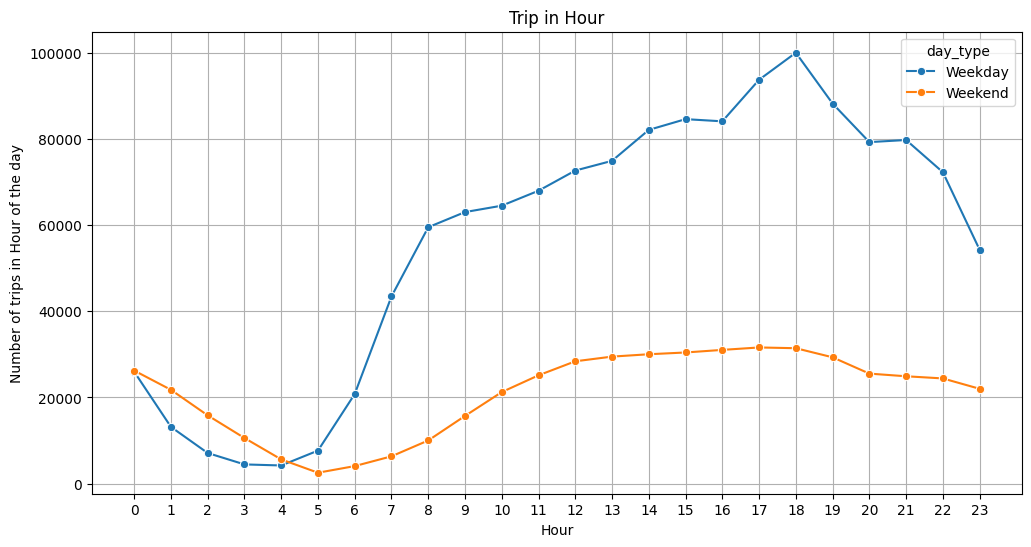

In [144]:
# Compare traffic trends for the week days and weekends
df1_nonzero['day_type'] = df1_nonzero.day_of_week.apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday')

# Group the data by pickup hour and day type, counting the number of trips
df4weekdays = df1_nonzero.groupby(['pickup_hour', 'day_type']).size().reset_index(name = 'count_of_trips').sort_values(by = 'count_of_trips',ascending = False)

# Sum the trips for weekdays and weekends
df4weekdayssum = df4weekdays.groupby('day_type')['count_of_trips'].sum()

# Calculate percentage of total trips for weekdays and weekends
df4weekdays_percent = (df4weekdayssum/df4weekdayssum.sum()) * 100
print(df4weekdays_percent)

# Visualize the trips per hour for weekdays and weekends
plt.figure(figsize = (12,6))
plt.title('Trip in Hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips in Hour of the day')
plt.xticks(range(0, 24))
plt.grid(True)
sns.lineplot(data = df4weekdays,x = 'pickup_hour', y = 'count_of_trips',hue = 'day_type', marker = 'o' )
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

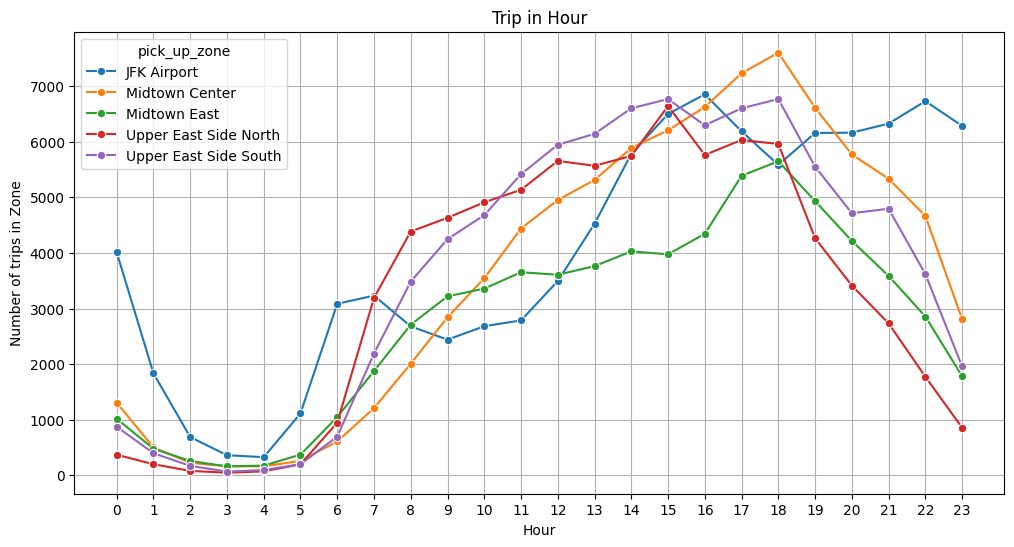

In [147]:
# Find top 10 pickup

# Map LocationID to zone names
zone_mapping = zones.groupby('LocationID')['zone'].first().to_dict()
df1_nonzero['pick_up_zone'] = df1_nonzero['PULocationID'].map(zone_mapping)

# Count the number of trips for each pickup hour and pickup zone
pzone_hourly_counts = df1_nonzero.groupby(['pickup_hour', 'pick_up_zone']).size().reset_index(name='trip_count')

# Get the top 10 pickup zones for each hour (sorted by trip_count in descending order)
top_10_pzones_by_hour = (pzone_hourly_counts.sort_values(['pickup_hour', 'trip_count'], ascending=[True, False]).groupby('pickup_hour').head(10))

# Identify the top 5 pickup zones based on total trips across all hours
top_pickup_zones = (pzone_hourly_counts.groupby('pick_up_zone')['trip_count'].sum().sort_values(ascending=False).head(5).index)

# Filter data for the top pickup zones
pickup_trend_data = pzone_hourly_counts[pzone_hourly_counts['pick_up_zone'].isin(top_pickup_zones)]

# Plot the pickup trends for top pickup zones
plt.figure(figsize = (12,6))
plt.title('Trip in Hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips in Zone')
plt.xticks(range(0, 24))
plt.grid(True)
sns.lineplot(data = pickup_trend_data,x = 'pickup_hour', y = 'trip_count',hue = 'pick_up_zone', marker = 'o' )
plt.show()

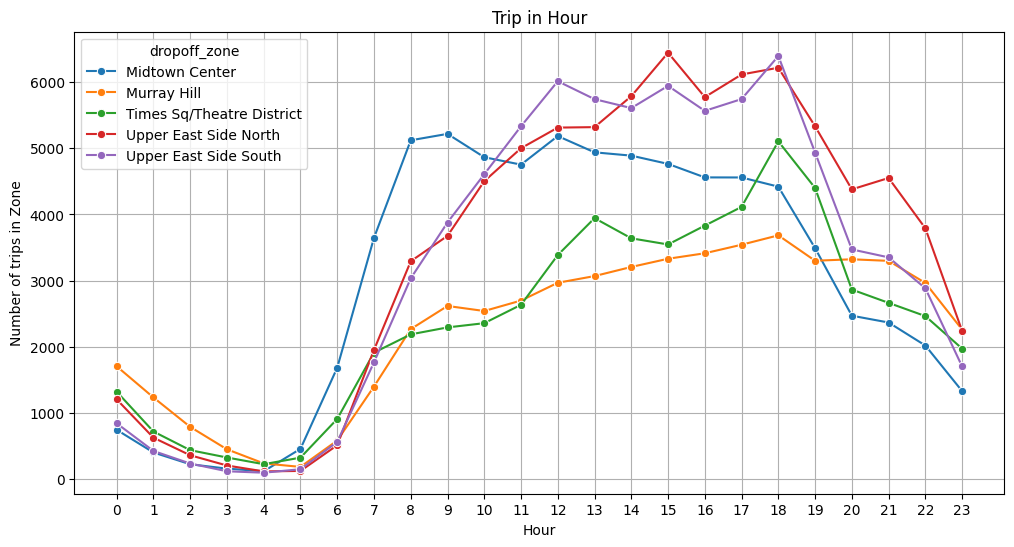

In [148]:
# Find top 10 dropoff zones
zone_mapping = zones.groupby('LocationID')['zone'].first().to_dict()
df1_nonzero['dropoff_hour'] = df1_nonzero.tpep_dropoff_datetime.dt.hour
df1_nonzero['dropoff_zone'] = df1_nonzero['DOLocationID'].map(zone_mapping)

# Count the number of trips for each dropoff hour and dropoff zone
dzone_hourly_counts = df1_nonzero.groupby(['dropoff_hour', 'dropoff_zone']).size().reset_index(name='trip_count')

# Get the top 10 dropoff zones for each hour (sorted by trip_count in descending order)
top_10_dzones_by_hour = (dzone_hourly_counts.sort_values(['dropoff_hour', 'trip_count'], ascending=[True, False]).groupby('dropoff_zone').head(10))

# Identify the top 5 dropoff zones based on total trips across all hours
top_dropoff_zones = (dzone_hourly_counts.groupby('dropoff_zone')['trip_count'].sum().sort_values(ascending=False).head(5).index)

# Filter data for the top dropoff zones
dropoff_trend_data = dzone_hourly_counts[dzone_hourly_counts['dropoff_zone'].isin(top_dropoff_zones)]

# Plot the dropoff trends for top dropoff zones
plt.figure(figsize = (12,6))
plt.title('Trip in Hour')
plt.xlabel('Hour')
plt.ylabel('Number of trips in Zone')
plt.xticks(range(0, 24))
plt.grid(True)
sns.lineplot(data = dropoff_trend_data,x = 'dropoff_hour', y = 'trip_count',hue = 'dropoff_zone', marker = 'o' )
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [150]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df1_nonzero.pick_up_zone.value_counts().rename('pickup_count')
dropoff_counts = df1_nonzero.dropoff_zone.value_counts().rename('dropoff_count')

# Combine pickup and dropoff counts into a single DataFrame
zone_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Filter out zones where there are no pickups or no dropoffs to avoid division by zero
zone_ratios = zone_ratios[(zone_ratios.dropoff_count != 0) & (zone_ratios.pickup_count != 0)]

# Calculate the pickup/dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = zone_ratios.pickup_count/zone_ratios.dropoff_count

# Find the top 10 and bottom 10 zones by highest pickup/dropoff ratio
top_10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = zone_ratios.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 zones by highest pickup/dropoff ratio:")
print(top_10[['pickup_dropoff_ratio']])
print('')
print("Bottom 10 zones by highest pickup/dropoff ratio:")
print(bottom_10[['pickup_dropoff_ratio']])

Top 10 zones by highest pickup/dropoff ratio:
                              pickup_dropoff_ratio
East Elmhurst                                 8.62
JFK Airport                                   4.45
LaGuardia Airport                             2.67
Jamaica Bay                                   2.00
Penn Station/Madison Sq West                  1.57
Greenwich Village South                       1.39
Central Park                                  1.36
West Village                                  1.34
Midtown East                                  1.25
Garment District                              1.19

Bottom 10 zones by highest pickup/dropoff ratio:
                                     pickup_dropoff_ratio
Murray Hill-Queens                                   0.01
Eastchester                                          0.01
Saint Albans                                         0.01
Newark Airport                                       0.01
Bayside                                              

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [152]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = list(range(0,6))
night_hours += [23]

#Filter data for night hours
df_night = df1_nonzero[df1_nonzero.pickup_hour.isin(night_hours)]

#Count pickups and dropoffs during night
pickup_counts = df_night.pick_up_zone.value_counts().head(10)
dropoff_counts = df_night.dropoff_zone.value_counts().head(10)

print("Top 10 pickup zones during night hours:")
print(pickup_counts)
print('')
print("Top 10 dropoff zones during night hours:")
print(dropoff_counts)


Top 10 pickup zones during night hours:
pick_up_zone
East Village                    15967
JFK Airport                     14618
West Village                    12885
Clinton East                    10473
Lower East Side                  9982
Greenwich Village South          9098
Times Sq/Theatre District        8336
Penn Station/Madison Sq West     6964
East Chelsea                     6291
Midtown South                    6238
Name: count, dtype: int64

Top 10 dropoff zones during night hours:
dropoff_zone
East Village                     8440
Clinton East                     7163
Murray Hill                      6427
Gramercy                         5777
East Chelsea                     5760
Lenox Hill West                  5384
Yorkville West                   5247
West Village                     5124
Times Sq/Theatre District        4784
Sutton Place/Turtle Bay North    4621
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue share by time of day:
hour_type
Day     87.81
Night   12.19
Name: total_amount, dtype: float64


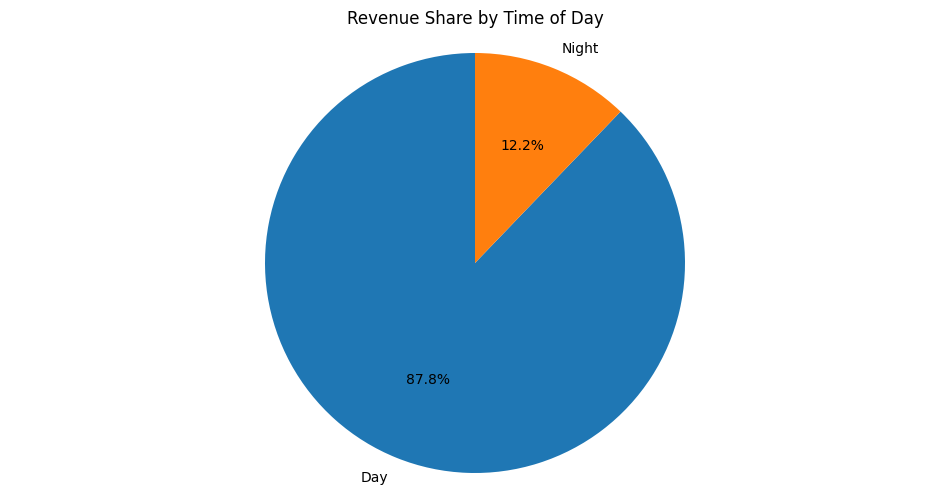

In [154]:
# Filter for night hours (11 PM to 5 AM)

# Define night hours: 11 PM to 5 AM
night_hours = list(range(0,6))
night_hours += [23]

# Tag each row as either 'Night' or 'Day' based on pickup hour
df1_nonzero['hour_type'] = df1_nonzero['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

#Count pickups and dropoffs during night
revenue_by_hour_type = df1_nonzero.groupby('hour_type')['total_amount'].sum()

#Calculate revenue share as percentage
revenue_share = (revenue_by_hour_type / revenue_by_hour_type.sum()) * 100

print("Revenue share by time of day:")
print(revenue_share)

# Pie chart for revenue share
plt.figure(figsize=(12,6))
plt.pie(revenue_share, labels=revenue_share.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Share by Time of Day')
plt.axis('equal') 
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [157]:
# Analyse the fare per mile per passenger for different passenger counts
df4faremilepass = df1_nonzero[(df1_nonzero.fare_amount > 0) & (df1_nonzero.passenger_count > 0)]

#Compute fare per mile and fare per mile per passenger
df4faremilepass['fare_per_mile'] = df4faremilepass.fare_amount / df4faremilepass.trip_distance
df4faremilepass['fare_per_mile_per_pass'] = df4faremilepass.fare_per_mile / df4faremilepass.passenger_count

#average fare per mile per passenger for different passenger counts
avg_fare_stats = df4faremilepass.groupby('passenger_count')['fare_per_mile_per_pass'].mean().reset_index()

print(avg_fare_stats)

   passenger_count  fare_per_mile_per_pass
0             1.00                   10.82
1             2.00                    6.78
2             3.00                    4.12
3             4.00                    4.51
4             5.00                    1.95
5             6.00                    1.50


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [159]:
# Compare the average fare per mile for different days and for different times of the day
dffaremiledays = df1_nonzero[(df1_nonzero.fare_amount > 0)]

#fare per mile column
dffaremiledays['fare_per_mile'] = dffaremiledays.fare_amount / dffaremiledays.trip_distance

#Group by day of the week
avg_fare_day = dffaremiledays.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
print(avg_fare_day.sort_values(by='fare_per_mile', ascending =False))



#Group by hour of the day
avg_fare_hour = dffaremiledays.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
print("\n", avg_fare_hour.sort_values(by='fare_per_mile', ascending =False))

  day_of_week  fare_per_mile
3      Sunday          11.94
5     Tuesday          11.74
4    Thursday          11.54
0      Friday          11.35
2    Saturday          11.31
6   Wednesday          11.09
1      Monday          10.83

     pickup_hour  fare_per_mile
5             5          15.87
4             4          14.40
16           16          13.42
14           14          13.09
12           12          12.38
13           13          12.32
17           17          12.16
15           15          12.13
18           18          11.72
11           11          11.54
19           19          11.13
23           23          10.95
10           10          10.85
9             9          10.79
2             2          10.68
0             0          10.66
20           20          10.30
6             6          10.29
21           21          10.14
8             8          10.13
7             7           9.87
1             1           9.67
22           22           9.61
3             3       

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

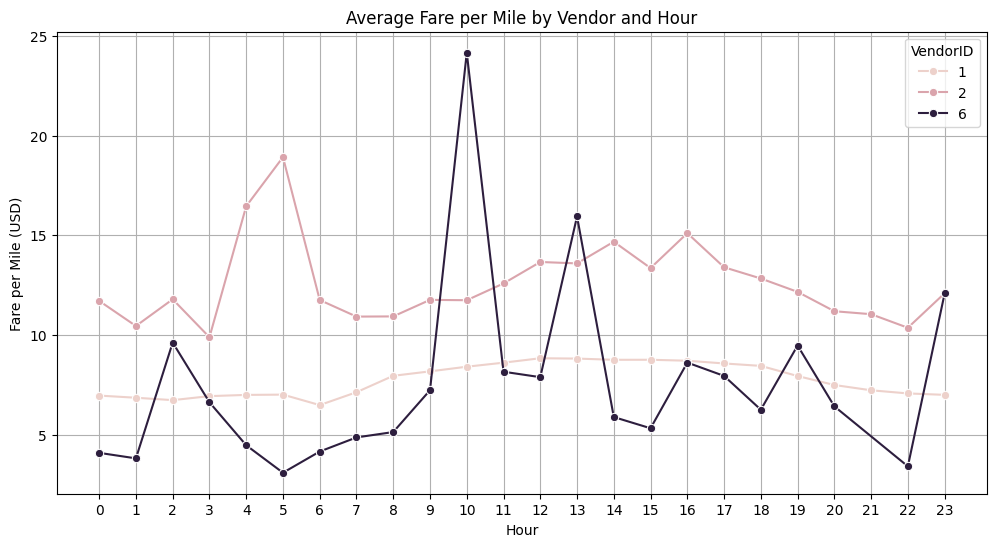

In [161]:
# Compare fare per mile for different vendors
df4faremileven = df1_nonzero[(df1_nonzero.fare_amount > 0)]

#Calculate fare per mile
df4faremileven['fare_per_mile'] = df4faremileven.fare_amount / df4faremileven.trip_distance

#Group by vendor and pickup hour
vendor_hourly_fare = df4faremileven.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()


plt.figure(figsize = (12,6))
plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.grid(True)
sns.lineplot(data = vendor_hourly_fare,x = 'pickup_hour', y = 'fare_per_mile',hue = 'VendorID', marker = 'o' )
plt.show()


In [225]:
# Output the average fare per mile for each vendor by hour as a table
pd.reset_option('display.max_rows')
vendor_hourly_fare_sorted = vendor_hourly_fare.sort_values(by=['VendorID', 'pickup_hour'])
print(vendor_hourly_fare_sorted)


    VendorID  pickup_hour  fare_per_mile
0          1            0           6.96
1          1            1           6.85
2          1            2           6.73
3          1            3           6.93
4          1            4           6.99
..       ...          ...            ...
66         6           18           6.25
67         6           19           9.47
68         6           20           6.42
69         6           22           3.41
70         6           23          12.08

[71 rows x 3 columns]


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


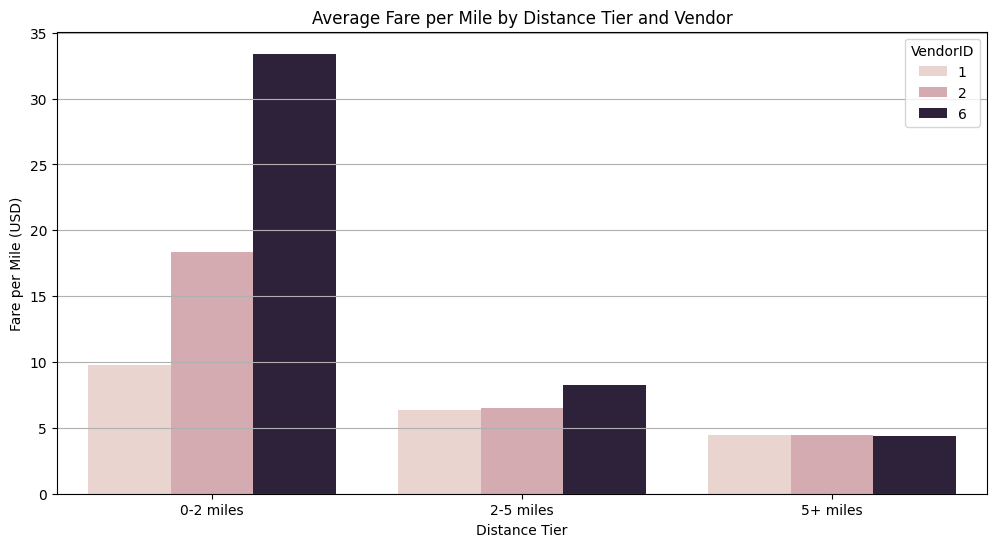

In [227]:
# Defining distance tiers
df4faremileven = df1_nonzero[(df1_nonzero.fare_amount > 0)]

# Create distance tier
def categorize_distance(miles):
    if miles <= 2:
        return '0-2 miles'
    elif miles <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

df4faremileven['distance_tier'] = df4faremileven['trip_distance'].apply(categorize_distance)

#Calculate fare per mile
df4faremileven['fare_per_mile'] = df4faremileven['fare_amount'] / df4faremileven['trip_distance']

# Group by Vendor and Distance Tier
tiered_fare = df4faremileven.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize = (12,6))
plt.title('Average Fare per Mile by Distance Tier and Vendor')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
sns.barplot(data = tiered_fare,x = 'distance_tier', y = 'fare_per_mile',hue = 'VendorID')
plt.show()

In [229]:
# Extract average fare per mile for each Vendor and Distance Tier (without plotting)
tiered_fare_numbers = tiered_fare.pivot(index='distance_tier', columns='VendorID', values='fare_per_mile')

# Display the results (this will give you the numbers directly)
print(tiered_fare_numbers)

VendorID         1     2     6
distance_tier                 
0-2 miles     9.77 18.35 33.41
2-5 miles     6.37  6.54  8.23
5+ miles      4.47  4.49  4.39


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

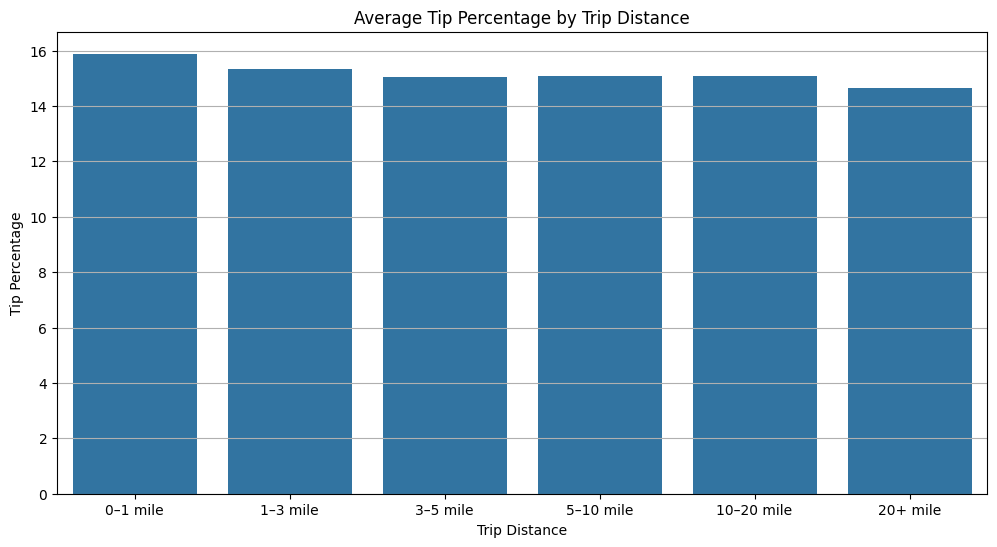

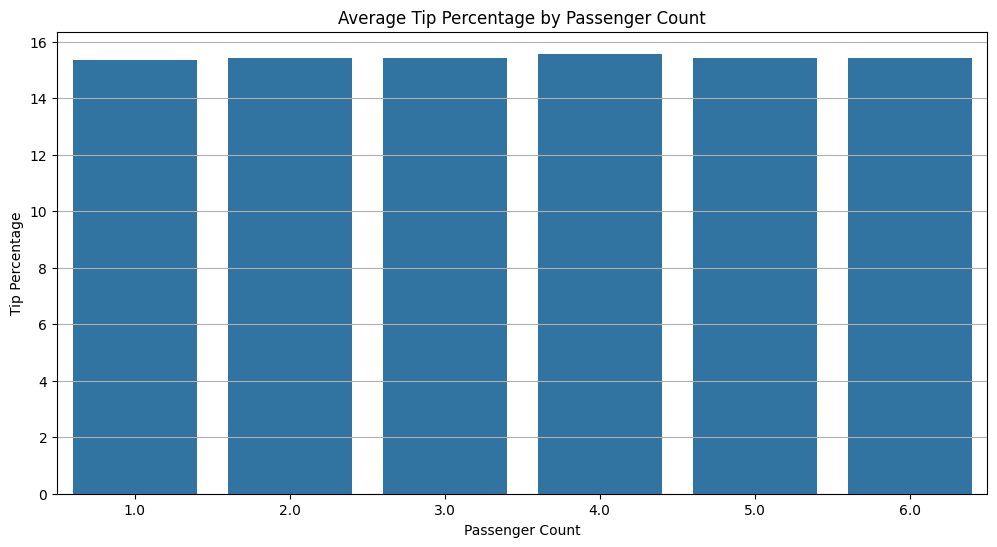

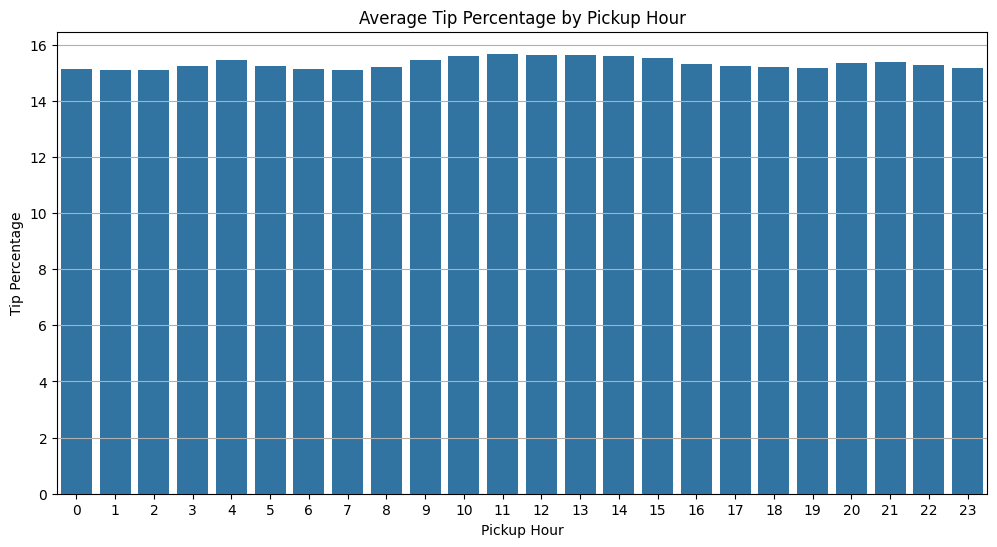

In [233]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df4tipspercent = df1_nonzero[(df1_nonzero.total_amount > 0) & (df1_nonzero.tip_amount > 0)]

# Calculate tip percentage
df4tipspercent['tip_percentage'] = (df4tipspercent['tip_amount'] / df4tipspercent['total_amount']) * 100

# Bin trip distances
df4tipspercent['distance_bin'] = pd.cut(df4tipspercent.trip_distance, bins=[0, 1, 3, 5, 10, 20, df4tipspercent.trip_distance.max()], labels=['0–1 mile', '1–3 mile', '3–5 mile', '5–10 mile', '10–20 mile', '20+ mile'])

# Group and calculate mean tip percentage - Distance
tip_by_distance = df4tipspercent.groupby('distance_bin')['tip_percentage'].mean().reset_index()
plt.figure(figsize = (12,6))
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Percentage')
plt.grid(True)
sns.barplot(data = tip_by_distance,x = 'distance_bin', y = 'tip_percentage')
plt.show()

# Group and calculate mean tip percentage - Passenger
tip_by_passengers = df4tipspercent.groupby('passenger_count')['tip_percentage'].mean().reset_index()
plt.figure(figsize = (12,6))
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.grid(True)
sns.barplot(data = tip_by_passengers,x = 'passenger_count', y = 'tip_percentage')
plt.show()

# Group and calculate mean tip percentage - Pickup hour
tip_by_hour = df4tipspercent.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
plt.figure(figsize = (12,6))
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Tip Percentage')
plt.grid(True)
sns.barplot(data = tip_by_hour,x = 'pickup_hour', y = 'tip_percentage')
plt.show()


In [235]:
tip_by_distance_values = tip_by_distance[['distance_bin', 'tip_percentage']]
print(tip_by_distance_values)

tip_by_passengers_values = tip_by_passengers[['passenger_count', 'tip_percentage']]
print(tip_by_passengers_values)

tip_by_hour_values = tip_by_hour[['pickup_hour', 'tip_percentage']]
print(tip_by_hour_values)


  distance_bin  tip_percentage
0     0–1 mile           15.88
1     1–3 mile           15.33
2     3–5 mile           15.05
3    5–10 mile           15.08
4   10–20 mile           15.09
5     20+ mile           14.66
   passenger_count  tip_percentage
0             1.00           15.35
1             2.00           15.41
2             3.00           15.43
3             4.00           15.58
4             5.00           15.43
5             6.00           15.41
    pickup_hour  tip_percentage
0             0           15.14
1             1           15.11
2             2           15.11
3             3           15.23
4             4           15.45
5             5           15.23
6             6           15.12
7             7           15.09
8             8           15.22
9             9           15.46
10           10           15.61
11           11           15.68
12           12           15.65
13           13           15.65
14           14           15.58
15           15           

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [364]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

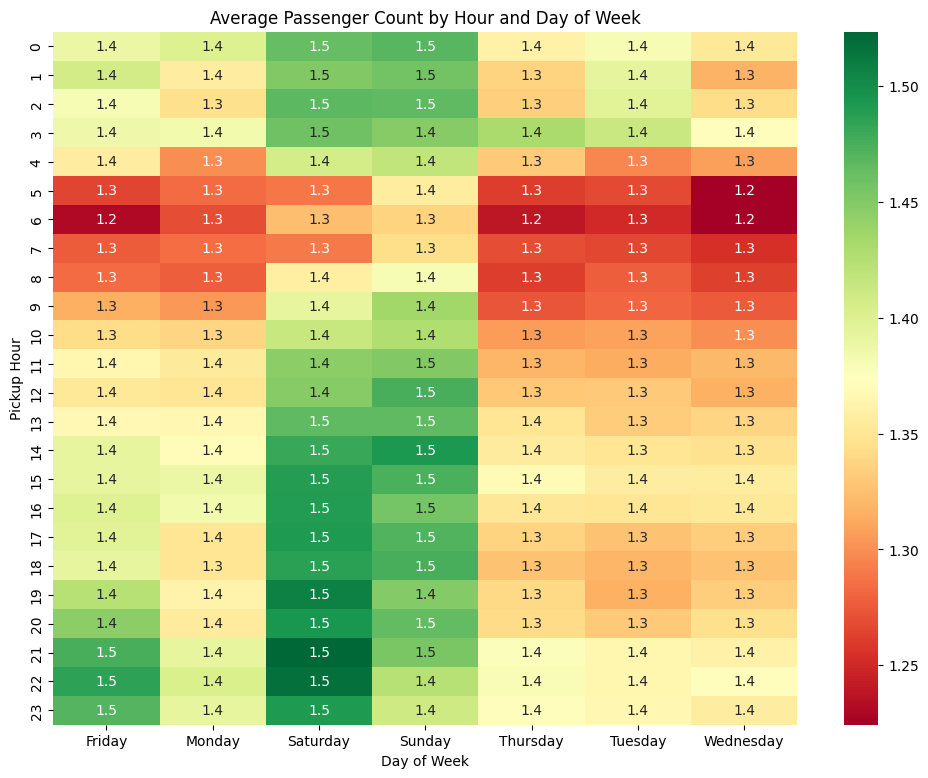

In [237]:
# See how passenger count varies across hours and days
# Group by pickup hour and day of week
passenger_hour_day = df1_nonzero.groupby(['pickup_hour', 'day_of_week'])['passenger_count'].mean().reset_index()

# create a pivot table with hour, day and for passenger count
pivot_table = passenger_hour_day.pivot(index='pickup_hour', columns='day_of_week', values='passenger_count')

# plot
plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn')
plt.title('Average Passenger Count by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Pickup Hour')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

                  pick_up_zone  passenger_count
40                 City Island             4.00
2      Arrochar/Fort Wadsworth             2.40
107                     Hollis             2.33
190  Saint George/New Brighton             2.00
97         Green-Wood Cemetery             2.00
83                   Flatlands             1.80
180                   Red Hook             1.79
8                 Battery Park             1.75
4                 Astoria Park             1.71
182              Richmond Hill             1.68
163        Ocean Parkway South             1.67
90               Fresh Meadows             1.67
243         Woodlawn/Wakefield             1.67
205                  Stapleton             1.67
22                Borough Park             1.67


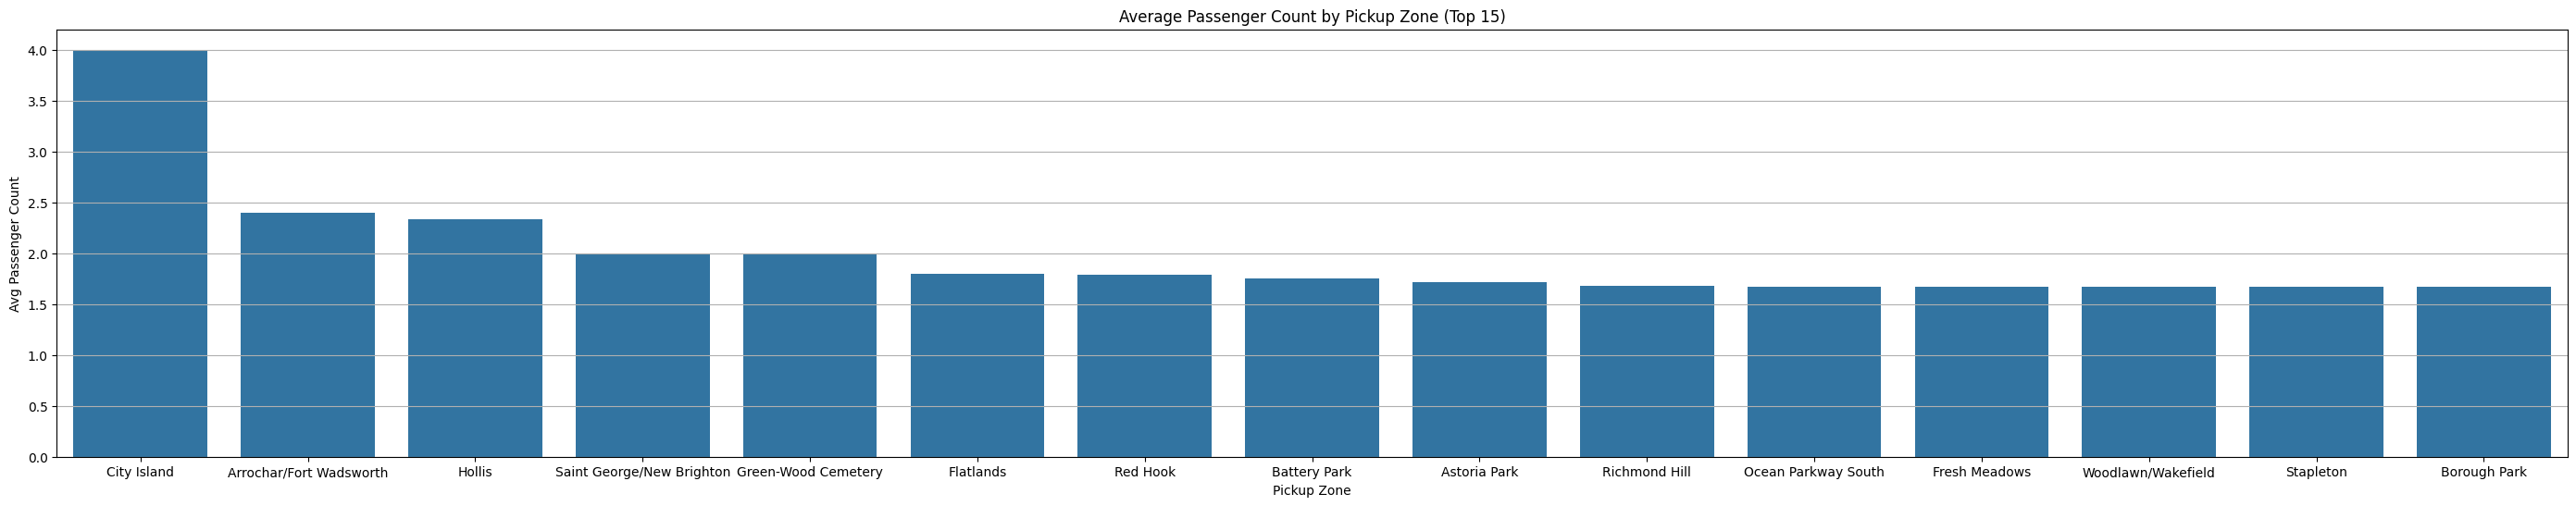

In [265]:
# How does passenger count vary across zones

#Group and average passenger counts per zone
passenger_counts_by_zone = df1_nonzero.groupby('pick_up_zone')['passenger_count'].mean().reset_index()

# Sort the passenger counts in descending order:
passenger_counts_by_zone = passenger_counts_by_zone.sort_values(by='passenger_count', ascending=False)
print(passenger_counts_by_zone.head(15))

#plot
plt.figure(figsize = (35,6))
plt.title('Average Passenger Count by Pickup Zone (Top 15)')
plt.xlabel('Pickup Zone')
plt.ylabel('Avg Passenger Count')
plt.grid(True)
sns.barplot(data = passenger_counts_by_zone.head(15),x = 'pick_up_zone', y = 'passenger_count')
plt.show()


In [373]:
print(df1_nonzero.columns)
print(zones.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'Date', 'Time',
       'Airport_fee', 'pickup_hour', 'day_of_week', 'month', 'quarter',
       'trip_duration', 'payment_type_label', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'borough', 'geometry', 'trip_duration_hours',
       'speed_mph', 'day_type', 'pick_up_zone', 'dropoff_hour', 'dropoff_zone',
       'hour_type'],
      dtype='object')
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'PULocationID', 'trip_count'],
      dtype='object')


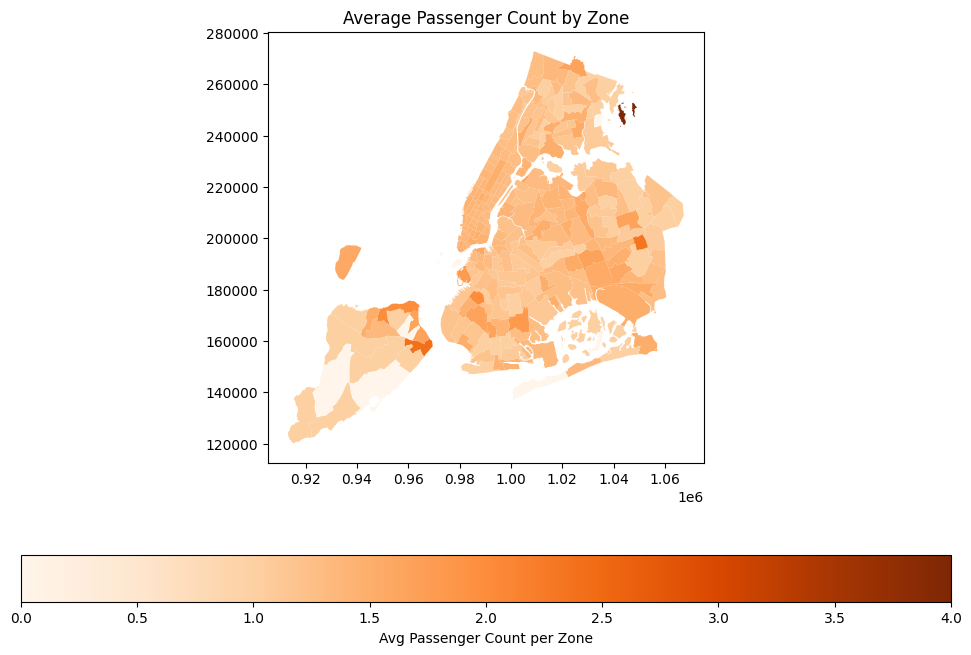

In [267]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Compute average passenger count by pickup zone
avg_passenger_by_zone = df1_nonzero.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Ensure no leftover PULocationID from prior merges in `zones`
zones = zones.drop(columns=['PULocationID'], errors='ignore')

# Merge with zones
zones = zones.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Final cleanup
zones.drop(columns=['PULocationID'], inplace=True)  # Now we’re sure it exists
zones['avg_passenger_count'] = zones['avg_passenger_count'].fillna(0)


fig, ax = plt.subplots(1, 1, figsize=(12, 8))
zones.plot(column='avg_passenger_count',ax=ax,legend=True,cmap='Oranges',legend_kwds={'label': "Avg Passenger Count per Zone", 'orientation': "horizontal"})
plt.title("Average Passenger Count by Zone")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Top 10 zones with highest 'extra' surcharge frequency:
                          extra_applied  congestion_applied  \
pick_up_zone                                                  
South Beach/Dongan Hills       1.000000            0.500000   
Eastchester                    1.000000            0.000000   
Fordham South                  1.000000            0.000000   
Marble Hill                    1.000000            0.000000   
Green-Wood Cemetery            1.000000            0.000000   
Rikers Island                  1.000000            1.000000   
LaGuardia Airport              0.987557            0.646642   
East Elmhurst                  0.835316            0.640534   
Oakland Gardens                0.800000            0.000000   
Lower East Side                0.799317            0.995757   

                          airport_fee_applied  
pick_up_zone                                   
South Beach/Dongan Hills             0.000000  
Eastchester                          0.00000

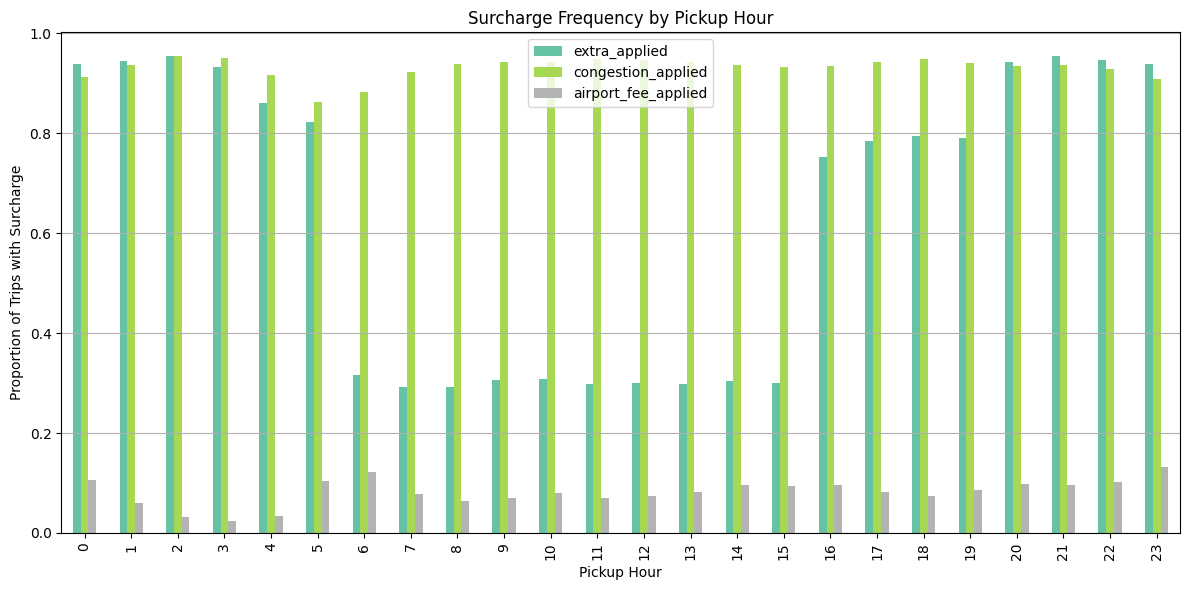

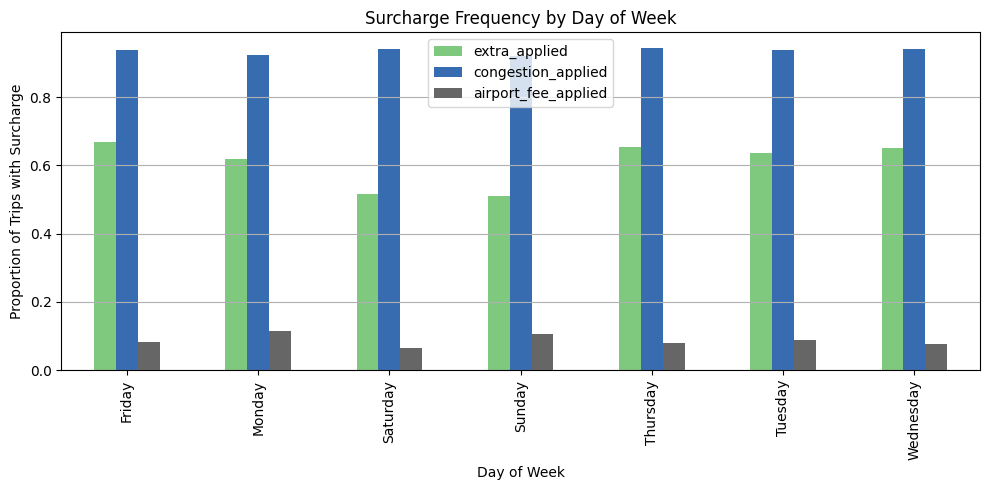

In [383]:
# How often is each surcharge applied?

# Create binary indicators for whether each surcharge is applied
df1_nonzero['extra_applied'] = (df1_nonzero['extra'] > 0).astype(int)
df1_nonzero['congestion_applied'] = (df1_nonzero['congestion_surcharge'] > 0).astype(int)
df1_nonzero['airport_fee_applied'] = (df1_nonzero['Airport_fee'] > 0).astype(int)


# Group by pickup zone to find average (i.e. % of trips with the charge applied)
surcharge_by_zone = df1_nonzero.groupby('pick_up_zone')[['extra_applied', 'congestion_applied', 'airport_fee_applied']].mean()

# Sort by extra surcharge frequency
surcharge_by_zone_sorted = surcharge_by_zone.sort_values(by='extra_applied', ascending=False)

# Display top 10 zones with most frequent extra charges
print("Top 10 zones with highest 'extra' surcharge frequency:")
print(surcharge_by_zone_sorted.head(10))


# Group by hour to see time trends
surcharge_by_hour = df1_nonzero.groupby('pickup_hour')[['extra_applied', 'congestion_applied', 'airport_fee_applied']].mean()

# Plot
surcharge_by_hour.plot(kind='bar', figsize=(12, 6), title='Surcharge Frequency by Pickup Hour', colormap='Set2')
plt.ylabel('Proportion of Trips with Surcharge')
plt.xlabel('Pickup Hour')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Group by day of week
surcharge_by_day = df1_nonzero.groupby('day_of_week')[['extra_applied', 'congestion_applied', 'airport_fee_applied']].mean()

# Plot
surcharge_by_day.plot(kind='bar', figsize=(10, 5), title='Surcharge Frequency by Day of Week', colormap='Accent')
plt.ylabel('Proportion of Trips with Surcharge')
plt.xlabel('Day of Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.